# LAB 02: Manipulating data and networks with python

July 5th 2022

* This tutorial aims at helping you to learn the basics of pandas and networkx package.
* There is no marking for this tutorial. You do not need to submit your solution to us.
* In the begining of this tutorial you will find a similar code than used in the class. In the end, I added exercises for you.
* We recommend you to solve this lab until the end of this class or next tuesday (July 12th).


## Pandas
Pandas is a library for manipulating and analyzing data. Part of this tutorial is based on this pandas cook book: https://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb

* Download the cyclist data from https://donnees.montreal.ca/ville-de-montreal/velos-comptage (year 2012)
* Read the csv
* Set the date as the index
* Select a column
* Select the rows from 02/01 until 05/01, and the columns Berri1 and Parc
* Calculate the maximum value of a column
* Add a new column to the data frame
* Remove a column from the data frame
* Add a row to the data frame
* Remove a row from the data frame
* Compute the pearson correlation for each pair of columns
* Plot a column
* Plot the data frame


<AxesSubplot:>

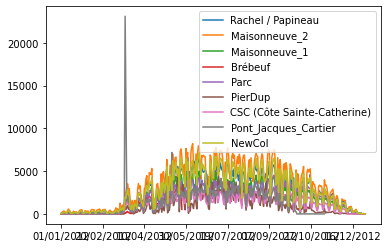

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('comptagevelo2012.csv', index_col='Date')

df['Berri1']

df.loc['02/01/2012':'05/01/2012',['Berri1', 'Parc']]

df['Berri1'].max()

df['NewCol'] = df['Berri1'] + 1

del df['Berri1']

df = df.append(pd.DataFrame(np.reshape(range(df.shape[1]), (1, df.shape[1])), index=['30/06/2021'], columns=df.columns))


df = df.drop('30/06/2021')

pd.DataFrame.corr(df)

df.plot()


## Networkx

* Load a graph of yeast protein-protein interactions using this list of edges: https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/bio-yeast-protein-inter/bio-yeast-protein-inter.edges
* Select the vertex with maximum degree
* Create a subgraph containing the neighbors of the vertex with maximum degree
* Plot the graph


Name: 
Type: Graph
Number of nodes: 1870
Number of edges: 2277
Average degree:   2.4353


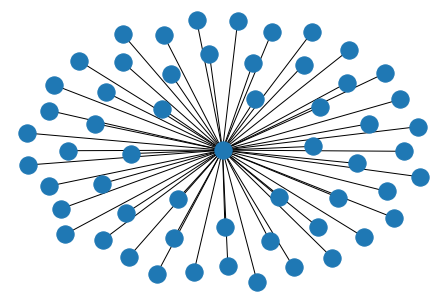

In [ ]:
import networkx as nx

G = nx.read_edgelist('bio-yeast-prote in-inter.edges')
G = nx.convert_node_labels_to_integers (G)

print(nx.info(G))
 
degrees = np.array(G.degree)

sel_nodes = np.where(degrees[:,1] == max(degrees[:,1]))
sel_nodes = sel_nodes[0][0]

N = list(nx.neighbors(G, sel_nodes))
N.append(sel_nodes)

S = nx.subgraph(G, N)

nx.draw(S)



## Exercise: building a gene co-expression network

* Download gene expression data from https://www.ime.usp.br/~suzana/coga/data/REMBRANDT_ODII_AII_log2_normalized_data.txt. Each column corresponds to an individual and each row to a gene. Each position of the matrix indicates the level of activity of a gene for a certain individual. 
* Use a pandas DataFrame to store the gene expression data
* Remove the 'Description' column
* Download this file indicating the type of brain cancer: https://www.ime.usp.br/~suzana/coga/data/REMBRANDT_AII_ODII.cls. AII corresponds to astrocytoma grade II, and ODII to oligodendroglioma grade II. The first row indicates the number of samples, and number of classes. The second row indicates the name of each class. Finally, the third row contains the label of each column (individual) in the gene expression data.
* Sample individuals at random so that both groups (AII) and (OII) have the same number of individuals
* Download this pathway database: http://www.gsea-msigdb.org/gsea/msigdb/download_file.jsp?filePath=/msigdb/release/7.4/c2.cp.reactome.v7.4.symbols.gmt. The website will ask you to register an email. If you don't want to register yours, just type my email (suzana.santos@fgv.br). Each row of this file contains the name of a pathway (representing a biological process), a link for the pathway description, and the genes that belong to this pathway.  
* Select the genes that belong to the REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS pathway, which is related to glioma aggressiveness.
* With the sampled individuals and the selected genes, build a correlation matrix between the genes for each class (AII and ODII).
* Transform both correlation matrices into adjacency matrices. For each class, replace the top 10% correlations (in absolute value) by 1, and the remaining values by zero.
* Build a graph for each adjacency matrix and plot both graphs (tip: networkx has a function for reading pandas matrices called from_pandas_adjacency).
* Compare how much the degrees of the nodes changed between AII and ODII.


More details on the dataset can be found at https://www.ime.usp.br/~suzana/coga/.

Name,MIB1,PSENEN,DLL4,ADAM10,UBB,RPS27A,APH1B,DTX4,DNER,JAG1,...,CNTN1,DLL1,APH1A,NEURL1B,ITCH,NOTCH1,UBC,UBA52,ADAM17,MIB2
0,-1,-2,0,4,0,0,-1,2,-4,6,...,-2,-1,3,0,0,-1,-3,1,-1,-3


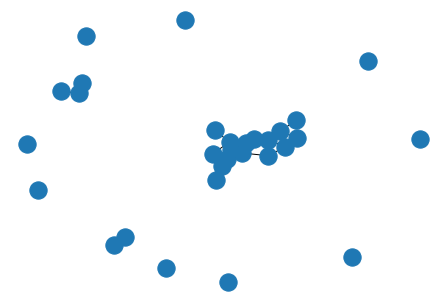

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import random

# Loading the data
df = pd.read_table('REMBRANDT_ODII_AII_log2_normalized_data.txt', index_col='Name')

# Deleting unused column
del df['Description']

# Transposing the matrix so that we have the genes on the columns
df = df.T

# Reading class file
f = open('REMBRANDT_AII_ODII.cls')
lines = f.readlines()
line = lines[2].strip('\n')
line = pd.array(line.split())
AII = line == 'AII'
ODII = line == 'ODII'
ODII = list(df.index[ODII])

random.seed(0)

# Sampling astrocytoma samples so that it has the same number as oligodendroglioma samples

AII = random.sample(list(df.index[AII]), len(ODII))

df = df.loc[[*AII, *ODII],:]

# Reading pathways

f = open('c2.cp.reactome.v7.4.symbols.gmt')
lines = f.readlines()

# Selecting the given pathway
pathway = 'REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS'
line = [line for line in lines if line.startswith(pathway)][0]
line = line.strip('\n')
line = pd.array(line.split())
genes = line[2:]
genes_inter = set(genes).intersection(set(df.columns))

# Filtering genes of interest

df = df[genes_inter]

# Building the correlation matrices

cor_AII = np.array(abs(df.loc[AII, :].corr()))
cor_ODII = np.array(abs(df.loc[ODII, :].corr()))

th = np.quantile(cor_AII, 0.9)
cor_AII[np.where(cor_AII >= th)] = 1
cor_AII[np.diag_indices(cor_AII.shape[0])] = 0
cor_AII[np.where(cor_AII < th)] = 0
cor_AII

th = np.quantile(cor_ODII, 0.9)
cor_ODII[np.where(cor_ODII >= th)] = 1
cor_ODII[np.diag_indices(cor_ODII.shape[0])] = 0
cor_ODII[np.where(cor_ODII < th)] = 0
cor_ODII

# Building the graphs

G_AII = nx.from_numpy_matrix(cor_AII)
G_ODII = nx.from_numpy_matrix(cor_ODII)

nx.draw(G_ODII)

degrees_AII = np.array(G_AII.degree)[:,1].astype(int)
degrees_ODII = np.array(G_ODII.degree)[:,1].astype(int)


diff = pd.DataFrame(np.reshape(degrees_AII - degrees_ODII, (1, len(genes_inter))), columns = df.columns)
diff

